# Example of using ST-DBSCAN 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_dbscan import ST_DBSCAN

In [2]:
df = pd.read_csv('test-data.csv')
df.head()

,time,animal_id,x,y
0,0,0,201.623002,186.148565
1,0,1,247.658670,177.650135
2,0,2,127.457230,20.572136
3,0,3,231.180722,172.861323
4,0,4,217.739517,189.203565


In [3]:
# normalize the data 
df['x'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())
# transform to numpy array
data = df.loc[:, ['time','x','y']].values

In [4]:
st_dbscan = ST_DBSCAN(eps1 = 0.05, eps2 = 10, min_samples = 5) 
# for list of all parameter description see - src code comments

In [5]:
st_dbscan.fit(data) 

/Users/erencakmak/opt/anaconda3/envs/movekit_env/lib/python3.8/site-packages/sklearn/neighbors/_base.py:175: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  warnings.warn('Precomputed sparse input was not sorted by data.',


In [6]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

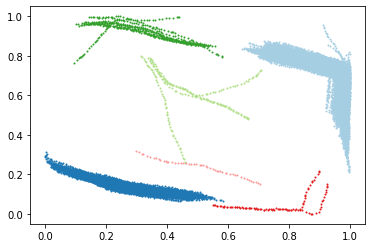

In [7]:
plot(data[:,1:], st_dbscan.labels) 